## Quotes dataset analysis

In [1]:
import pandas as pd
import itertools
import re

In [2]:
file = "../raw_data/quotes.csv"
quotes = pd.read_csv(file, decimal=",")
quotes.head(3)

,quote,author,category
0,"I'm selfish, impatient and a little insecure. ...",Marilyn Monroe,"attributed-no-source, best, life, love, mistak..."
1,You've gotta dance like there's nobody watchin...,William W. Purkey,"dance, heaven, hurt, inspirational, life, love..."
2,You know you're in love when you can't fall as...,Dr. Seuss,"attributed-no-source, dreams, love, reality, s..."


In [3]:
quotes.shape

(499709, 3)

In [4]:
quotes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 499709 entries, 0 to 499708
Data columns (total 3 columns):
 #   Column    Non-Null Count   Dtype 
---  ------    --------------   ----- 
 0   quote     499708 non-null  object
 1   author    497956 non-null  object
 2   category  499646 non-null  object
dtypes: object(3)
memory usage: 11.4+ MB


In [5]:
count_per_author = quotes.groupby(quotes['author']).count()
len(count_per_author)

117296

In [6]:
tags_list = quotes.category.to_list()
number_of_tags = []
for i in tags_list:
    number_of_tags.append(len(str(i).split(',')))
    
quotes['list_tags'] = quotes['category'].copy()
quotes['count_tags'] = number_of_tags
quotes.head()

,quote,author,category,list_tags,count_tags
0,"I'm selfish, impatient and a little insecure. ...",Marilyn Monroe,"attributed-no-source, best, life, love, mistak...","attributed-no-source, best, life, love, mistak...",8
1,You've gotta dance like there's nobody watchin...,William W. Purkey,"dance, heaven, hurt, inspirational, life, love...","dance, heaven, hurt, inspirational, life, love...",7
2,You know you're in love when you can't fall as...,Dr. Seuss,"attributed-no-source, dreams, love, reality, s...","attributed-no-source, dreams, love, reality, s...",5
3,A friend is someone who knows all about you an...,Elbert Hubbard,"friend, friendship, knowledge, love","friend, friendship, knowledge, love",4
4,Darkness cannot drive out darkness: only light...,"Martin Luther King Jr., A Testament of Hope: T...","darkness, drive-out, hate, inspirational, ligh...","darkness, drive-out, hate, inspirational, ligh...",7


In [7]:
for index,row in quotes.iterrows():
    quotes.at[index, 'list_tags'] = str(row['list_tags']).split(',')# For each row update the 'Bonus' value to it's double
quotes.head()

,quote,author,category,list_tags,count_tags
0,"I'm selfish, impatient and a little insecure. ...",Marilyn Monroe,"attributed-no-source, best, life, love, mistak...","[attributed-no-source, best, life, love, m...",8
1,You've gotta dance like there's nobody watchin...,William W. Purkey,"dance, heaven, hurt, inspirational, life, love...","[dance, heaven, hurt, inspirational, life,...",7
2,You know you're in love when you can't fall as...,Dr. Seuss,"attributed-no-source, dreams, love, reality, s...","[attributed-no-source, dreams, love, realit...",5
3,A friend is someone who knows all about you an...,Elbert Hubbard,"friend, friendship, knowledge, love","[friend, friendship, knowledge, love]",4
4,Darkness cannot drive out darkness: only light...,"Martin Luther King Jr., A Testament of Hope: T...","darkness, drive-out, hate, inspirational, ligh...","[darkness, drive-out, hate, inspirational, ...",7


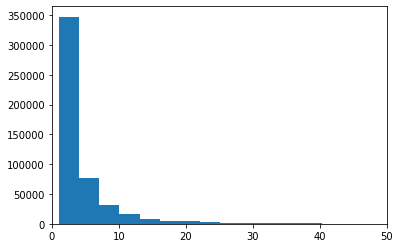

In [8]:
import matplotlib.pyplot as plt
# matplotlib histogram
plt.hist(quotes.count_tags, bins=100)
plt.xlim(xmin=0,xmax=50)
plt.show()

In [9]:
quotes.count_tags.describe()


count    499709.000000
mean          4.916834
std           6.274429
min           1.000000
25%           2.000000
50%           3.000000
75%           5.000000
max         303.000000
Name: count_tags, dtype: float64

In [10]:
tags_vocab = []
tags_vocab1 = []
for i in quotes.category:
    tags_vocab.append(i)
for i in tags_vocab:
    tags_vocab1.append(str(i).split(','))

vocab_list = set(list(itertools.chain(*tags_vocab1)))

In [11]:
print(f"Unique tags used altogether: {len(vocab_list)}")

Unique tags used altogether: 175998


In [12]:
quotes['quotes_length'] = quotes['quote'].copy()
for index, row in quotes.iterrows():
    quotes.loc[index, "quotes_length"] = len(str(row['quotes_length']).split(' '))
    


KeyboardInterrupt: 

In [ ]:
quotes.head()

In [ ]:
quotes.quote[3]

In [ ]:
plt.scatter(quotes.quotes_length,quotes.count_tags)
plt.xlabel('Length of quotes')
plt.ylabel('Number of tags')

In [ ]:
quotes.loc[quotes['count_tags'] > 300, ['quote','category']]


In [14]:
tags_df = pd.DataFrame(vocab_list)

In [21]:
tags_df=tags_df.rename(columns = { 0: 'Unique tags'})

In [22]:
#tags_df.to_csv("../raw_data/tags.csv",index=False)